# Table of Content

1.   [Length and Number Counts of Textual Data](#scrollTo=dqe_ZPuoQ1_o)
2.   [Text Cleaning](#scrollTo=wSD-9F0rQ6vn&line=1&uniqifier=1)
3.   [Generating Word Clouds](#scrollTo=72RBq4o4RA44)
4.   [Most Common Words](#scrollTo=SJqIGK7SRH8K)
5.   [Keyword Extraction](#scrollTo=8nPcZRTdj60P)
6.   [BERTopic](#scrollTo=yi5TrxAXZ6cl)
7.   [Similarity Between Textual Data-TF-IDF](#scrollTo=0gBANaNVuXjQ)
8.   [Convert Sentence into Vectors-BERT](#scrollTo=whGT_XpxnYaW)
9.   [Similarity Between Textual Data-BERT](#scrollTo=kcFEV5odPdDG)




# Imports

In [ ]:
!pip install wordninja
!pip install nltk
!pip install -U sentence-transformers
!pip install wordcloud
!pip3 install keybert
!pip install bertopic[visualization] --quiet
!pip install flatten-everything # for extracting list of lists
!pip install session-info

In [ ]:
import pandas as pd
import numpy as np
import re, string
import warnings
import json
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# For textual data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import wordninja # For splitting adjacent text
from nltk.tokenize import word_tokenize # Tokenize
from nltk.stem.porter import PorterStemmer #Stemming 
from collections import Counter
from nltk.corpus import stopwords # To remove stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# # To create word cloud
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
# BERTOPIC
from copy import deepcopy
from bertopic import BERTopic
from flatten_everything import flatten_everything

from sentence_transformers import SentenceTransformer # For word/sentence embeddings
from yellowbrick.text import FreqDistVisualizer
from keybert import KeyBERT
from sklearn.metrics.pairwise import cosine_similarity
import session_info

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Upload the data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/walmart c1 bootcamp/df_after_cleaning.csv',  index_col=0)
df.head()

In [ ]:
# FOR HANDE
df = pd.read_csv('df_after_cleaning.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (65,66,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,category_and_sub_category,customers_who_bought_this_item_also_bought,...,pi_sub_category11,seller_rank,ship_weight,ship_weight_type,ship_weight_g,deli_dest,first_del_date,feedback,#_tech_details,#_items_bought_view
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.onlineretail.co/Hornby-R8150-Catalo...,...,NaN,69.0,640,g,640.0,Help page to see where this item can be deliv...,24 Dec. 2013,Would you like to update product info or give ...,26,4.0
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.onlineretail.co/Christmas-Holiday-E...,...,NaN,261.0,NaN,NaN,NaN,Help page to see where this item can be deliv...,NaN,NaN,11,4.0
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.onlineretail.co/Classic-Train-Light...,...,NaN,72.0,NaN,NaN,NaN,Help page to see where this item can be deliv...,25 July 2013,Would you like to update product info or give ...,13,4.0
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,...,NaN,1480.0,259,g,259.0,Help page to see where this item can be deliv...,3 Mar. 2011,Would you like to update product info or give ...,16,0.0
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.onlineretail.co/Hornby-R6367-RailRo...,...,NaN,108.0,159,g,159.0,Help page to see where this item can be deliv...,12 Jun. 2013,Would you like to update product info or give ...,18,4.0


In [ ]:
df.shape

(10000, 78)

# 1. Length and Number Counts of Textual Data

**NOTE:** In this section, we will calculate the length and number counts of textual raw data. 

In [ ]:
# Create a new function that shows the count of numbers in description
def find_number(x):
    num = len(re.findall(r'([0-9]+ )|([0-9]+[.:]+[0-9]+)|([0-9]+.)',x)) 
    return num

## 1.1 Questions and Answers

**NOTE:** In raw data, the questions and answers are in the same columns. First, let's split these two features.

**Note:** In the raw data, there are 765 missing values for df['number_of_answered_questions']. These missings were filled by zero.

In [ ]:
# How many products number_of_answered_questions is zero?
df[df['number_of_answered_questions']==0].shape[0]

765

In [ ]:
# Let's test if there is a prouduct with 'number_of_answered_questions is 0 and Q&A text

df[(df['number_of_answered_questions']==0) &
   (df['customer_questions_and_answers'].isna()==False)]
   #['customer_questions_and_answers' ]

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,category_and_sub_category,customers_who_bought_this_item_also_bought,...,pi_sub_category11,seller_rank,ship_weight,ship_weight_type,ship_weight_g,deli_dest,first_del_date,feedback,#_tech_details,#_items_bought_view
1646,2812d200d5b6ee65aec48d3366bbe9c9,Intex 12ft Easy Set Pool Cover,Intex,9.95,18 new,50,0,4.1,Sports Toys & Outdoor > Beach Toys > Paddling ...,http://www.onlineretail.co/Intex-Easy-Foot-Fil...,...,NaN,5.0,3.1,Kg,3.13.13.13.13.13.13.13.13.13.13.13.13.13.13.13...,Help page to see where this item can be deliv...,7 Sept. 2007,Would you like to update product info or give ...,20,4.0
2668,5cc8a711f5811a04d5802caf2869b957,Yu-Gi-Oh Cosmo Blazer Booster Box (24 packs),Yu-Gi-Oh!,54.99,2 new,2,0,4.5,Hobbies > Trading Cards & Accessories > Packs ...,http://www.onlineretail.co/Yu-Gi-Oh-Premium-Go...,...,NaN,4230.0,381,g,381.0,Help page to see where this item can be deliv...,19 Jan. 2013,Would you like to update product info or give ...,21,4.0


In [ ]:
# One of cases - that have 1 Q&A text
df.iloc[1646]['customer_questions_and_answers']

'does it have an inflated bottom? // No'

In [ ]:
# One of cases - that have 3 Q&A text
df.iloc[2668]['customer_questions_and_answers']

'Are these the newest cards out? // HelloYes they are. Thanks | Does this include the binder // Yes it has the folder to put the cards in. | Does this include the Binder // It comes with a folder containing a4 sheets of card sleeves.'

In [ ]:
# impute them 1 and 3
df.loc[1646,'number_of_answered_questions'] = 1
df.loc[2668,'number_of_answered_questions'] = 3

In [ ]:
# the total number of number_of_answered_questions
print('What is the total number of number_of_answered_questions?')
df['number_of_answered_questions'].sum()

What is the total number of number_of_answered_questions?


16950

In [ ]:
# how many products have Q&A text?
df[df['customer_questions_and_answers'].isna()==False].shape

(914, 78)

In [ ]:
# some questions seperated by | instead of //
df['customer_questions_and_answers']= df['customer_questions_and_answers'].str.replace('|', '//')

# Create a new df for customers' each Q and A. We won't use df_qa in analysis, will use just splitting.
df_qa = df['customer_questions_and_answers'].str.split(' //',expand=True) # There is space before // to differentiate from httpss:// 

df_qa.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Does this catalogue detail all the previous Ho...,HiThe 2014 catalogue does indeed detail previ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,can you turn off sounds,hi no you cant turn sound off,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,What is the gauge of the track,"Hi Paul.Truthfully, I'm not sure. But it's ve...",what is the layout of the tracks?,Its an oval shape layout,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Number of Questions and Answers*

In [ ]:
# Create a new column that contains all questions/answers as list. List elements are questions.
# Create new columns - exclude None - new columns are list of question
df = df.assign(question_list = df_qa[[0,2,4,6,8,10,12,14,16,18]].stack().groupby(level=0).agg(list))
df = df.assign(answer_list = df_qa[[1,3,5,7,9,11,13,15,17,19]].stack().groupby(level=0).agg(list))


# create new column that shows the count questions and answers for each product
df['#_questions'] = df['question_list'].str.len()
df['#_answers'] = df['answer_list'].str.len()

df['#_questions'] = df['#_questions'].fillna(0)
df['#_answers'] = df['#_answers'].fillna(0)

# how many question and answer text that we have
print(f"The count of questions: {df['#_questions'].sum()}")
print(f"The count of answers: {df['#_answers'].sum()}")

The count of questions: 1679.0
The count of answers: 1679.0


**IMPORTANT** Many answers includes ''see more .... see less''. This will change the metric of customer Q&A.Some parts are duplicated because of "see more ... see less". For instance: 

In [ ]:
df_qa.iloc[0,1]

' HiThe 2014 catalogue does indeed detail previous models but also includes new releases for 2014.You would be advised to purchase models as you need them to avoid them being discontinued in subsequent years…\n    \n      see more\n    \n  \n  \n    HiThe 2014 catalogue does indeed detail previous models but also includes new releases for 2014.You would be advised to purchase models as you need them to avoid them being discontinued in subsequent yearsHope this helps\n    \n      see less'

In [ ]:
# Check if there is 'see more' in questions.
output = 0
for i in range(10):
  if df_qa.iloc[:, 2*i].str.contains('see more').sum()>0:
    output +=1
print(f"There is/are 'see more' in {output} column(s).")

There is/are 'see more' in 0 column(s).


In [ ]:
# Check if there is 'see more' in answers.
output = 0
for i in range(10):
  if df_qa.iloc[:, 2*i+1].str.contains('see more').sum()>0:
    output +=1
print(f"There is/are 'see more' in {output} column(s).")

There is/are 'see more' in 9 column(s).


In [ ]:
# Remove the text before 'see more' 
df_qa = df_qa.fillna('')
for row in range(len(df_qa)):
  for i in range(10):
    if 'see more' in df_qa.iloc[row, 2*i+1]:
      df_qa.iloc[row, 2*i+1] = df_qa.iloc[row, 2*i+1].replace('\n', '').split('see more')[1].split('see less')[0]

**NOTE:** In raw data, Q&As are in the same column. They we seperated. Questions/Answers will merge to main df with two diffent type. 

*  "question_list"/"answer_list" => List elements are questions/answers. 
*  "question_list"/"answer_list" => All questions/answers are merged in a cell as string.




In [ ]:
# Create a new column that contains all questions/answers as text
df['question_text'] = df_qa[[0,2,4,6,8,10,12,14,16,18]].fillna('').apply(lambda x: ''.join(x), axis=1)
df['answer_text'] = df_qa[[1,3,5,7,9,11,13,15,17,19]].fillna('').apply(lambda x: ''.join(x), axis=1)

In [ ]:
# Average length of questions and answers
df['ave_length_question'] = df['question_text'].apply(lambda x: len(str(x).split()))/df['#_questions']
df['ave_length_answers'] = df['answer_text'].apply(lambda x: len(str(x).split()))/df['#_answers']

# Fill NAN with 0
df['ave_length_question'] = df['ave_length_question'].fillna(0)
df['ave_length_answers'] = df['ave_length_answers'].fillna(0)

In [ ]:
# The count numbers in questions and answers with using 'find_number()' function
df['que_#_numb'] = df['question_text'].apply(lambda x: find_number(x))
df['ans_#_numb'] = df['answer_text'].apply(lambda x: find_number(x))

NOTE: We want to check if there is an extraordinary question/answers by viewing the length of descriptions and count of numbers in descriptions.

In [ ]:
# Check the average length of questions. It seems normal.
df['ave_length_question'].value_counts().sort_index()

0.0     9086
1.0        1
2.0        1
3.0       11
3.5        1
        ... 
30.0       2
31.0       3
32.0       1
33.0       2
34.0       1
Name: ave_length_question, Length: 135, dtype: int64

In [ ]:
# Check the average length of answers.
df['ave_length_answers'].value_counts().sort_index().tail(10)

80.0     2
88.0     1
91.0     1
93.0     1
96.0     2
104.0    1
121.0    1
143.0    1
203.0    1
221.0    1
Name: ave_length_answers, dtype: int64

In [ ]:
# Check the product whose average length is moe than 200
print(df[df['ave_length_answers']>200]['answer_text'].index)
      
df['answer_text'][9578]

Int64Index([9353, 9578], dtype='int64')


'            Thank you for the question.To "Movie Masterpiece" series of Hot Toys, in the movie "Iron Man 2" from Iron Man Mark 2 (Armor Unleashed version) lineup! Height approx 30cm, the figure that 36 or more points can move, mark 2 is equipped with and then are gimmicks and detail, it is to reproduce sophisticated even texture of armor. Arc reactor of the eyes and chest, Repulsor ray launch part of both hands, be equipped with white emitting LED light-up function. Light up hand parts corresponding to the function, of course, is also included hand parts fingertip moving. Arms missile launcher, the back of the air flaps, air brakes of the legs, can store both to armor. Head two comes with, one eye, light-up function support of the helmet to. Second, it is a helmet that face you clear the portrait rights of Don Cheadle who plays James Rose Lieutenant Colonel peek. And the biggest attraction of this item, that the mechanical internal structure of the mark 2 is reproduced. Remove some of

# 2. Text Cleaning 

**NOTE:** In this section, we will clean the text for word clouds, common words, keywords, TF-IDF. 

In [ ]:
# Create a new function to split the adjacent words with wordninja
def split_adjacent_words(description):
    words = wordninja.split(description)
    return" ".join(words)

# Define a function for removing noisy text
def text_cleaning(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    # remove HTML
    text = re.compile(r'<.*?>').sub(r'',text)
    # remove emoji
    text = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                         u"\U0001F680-\U0001F6FF"  # transport & map symbols
                         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                         u"\U00002702-\U000027B0"
                         u"\U000024C2-\U0001F251"
                         "]+", flags=re.UNICODE).sub(r'', text)
    # remove URL
    text = re.compile(r'https?://\S+|www\.\S+').sub(r'',text)
    # remove white spaces
    text = re.sub("\s\s+" , " ", text)
    # remove text in the square brackets
    text = re.sub('\[[^]]*\]','', text)
    # remove line symbol
    text = re.sub('\n', '', text)
    # remove words that contain numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)

    return text

def stopwords_shortwords(text):
    # filter out stop words
    words = text.split()
    stop_words = set(stopwords.words( 'english' ))
    words = [w for w in words if not w in stop_words]
    # filter out short tokens
    for word in words:
        if word.isalpha():
            words = [word for word in words if len(word) > 1 ]
        else:
            words = [word for word in words]
    return" ".join(words)

In [ ]:
# Apply three defined function to four textual data
text_feature_list = ['description', 'product_information', 'question_text', 'answer_text']

for feature in text_feature_list:
  df[f"{feature}_clean"] = df[feature].fillna('')
  df[f"{feature}_clean"] = df[f"{feature}_clean"].apply(lambda x : split_adjacent_words(x))
  df[f"{feature}_clean"] = df[f"{feature}_clean"].apply(lambda x : text_cleaning(x))
  df[f"{feature}_clean"] = df[f"{feature}_clean"].apply(lambda x : stopwords_shortwords(x))


# 3. Generating Word Clouds

In [ ]:
# Define a function for generating a word cloud image

def create_wordcloud(x):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color = 'black', mode="RGBA", max_words=100).generate(' '.join(x))
  plt.figure(figsize=[10,10])
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()     

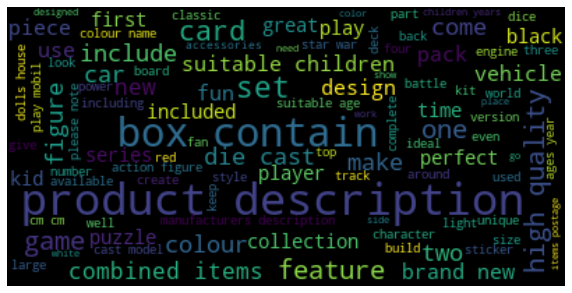

In [ ]:
# Generate word cloud for Product Description
create_wordcloud(df['description_clean'])

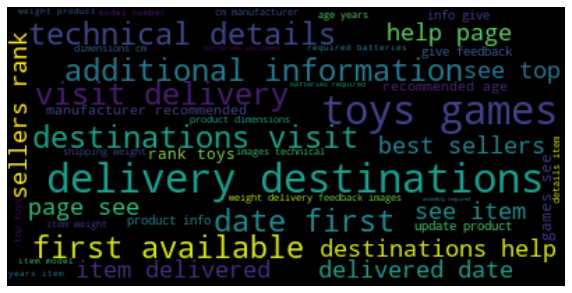

In [ ]:
# Generate word cloud for Product Information
create_wordcloud(df['product_information_clean'])

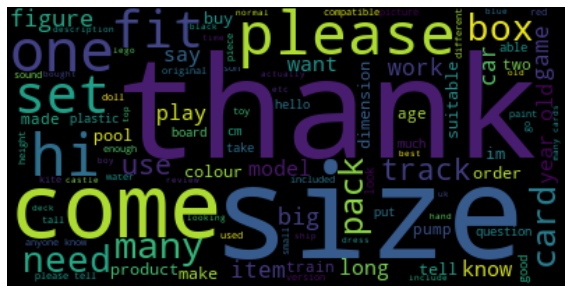

In [ ]:
# Generate word cloud for QUESTIONS
create_wordcloud(df['question_text_clean'])

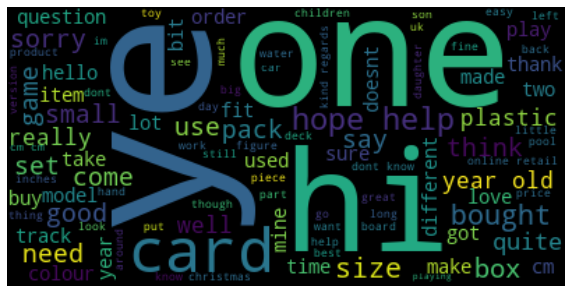

In [ ]:
# Generate word cloud for ANSWERS
create_wordcloud(df['answer_text_clean'])

# 4. Most Common Words

In [ ]:
# Define a function that generate a barplot of common words
def most_common_words(x):
  # Instantiate a uni-bigram vectorizer
  cv_vec = CountVectorizer(max_features=100, 
                                  stop_words='english', 
                                  ngram_range = (1,2))

  # Fit and apply vectorizer
  cv = cv_vec.fit_transform(x)

  # Use FreqDist for generating bar chart for most common 30 words
  visualizer = FreqDistVisualizer(features=cv_vec.get_feature_names_out(), orient='h', color = 'steelblue',  n=30, size=(900, 600))
  plt.tick_params(axis='both', which='major', labelsize=15)
  visualizer.fit(cv)
  visualizer.show()

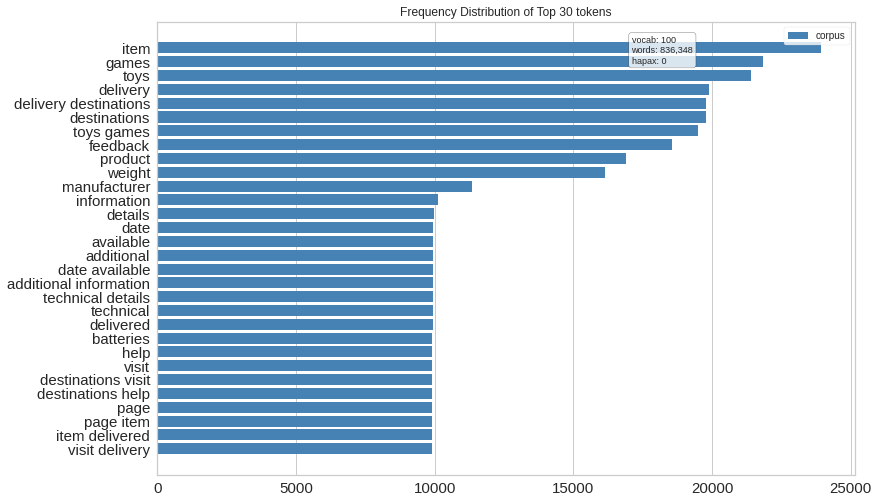

In [ ]:
# Generate a barplot of Product Information
most_common_words(df['product_information_clean'])

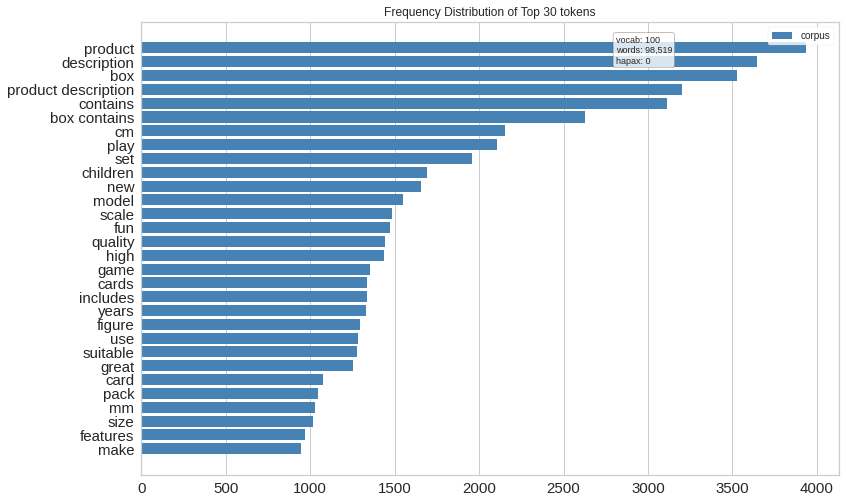

In [ ]:
# Generate a barplot of Product Description
most_common_words(df['description_clean'])

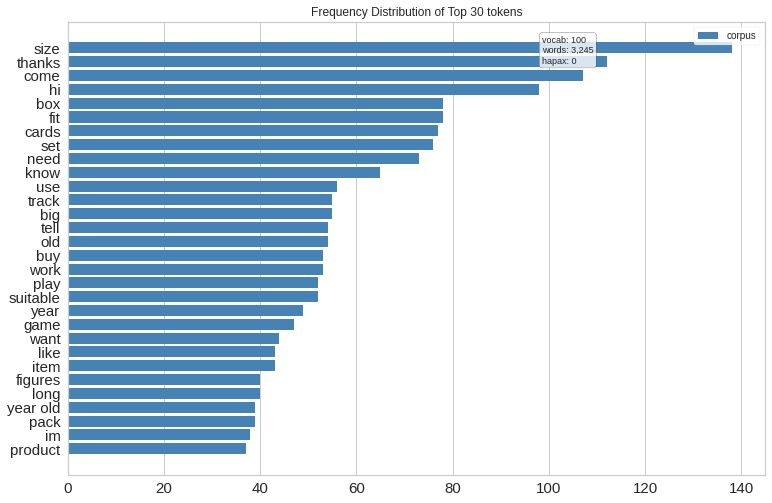

In [ ]:
## Generate a barplot of Customer Questions
most_common_words(df['question_text_clean'])

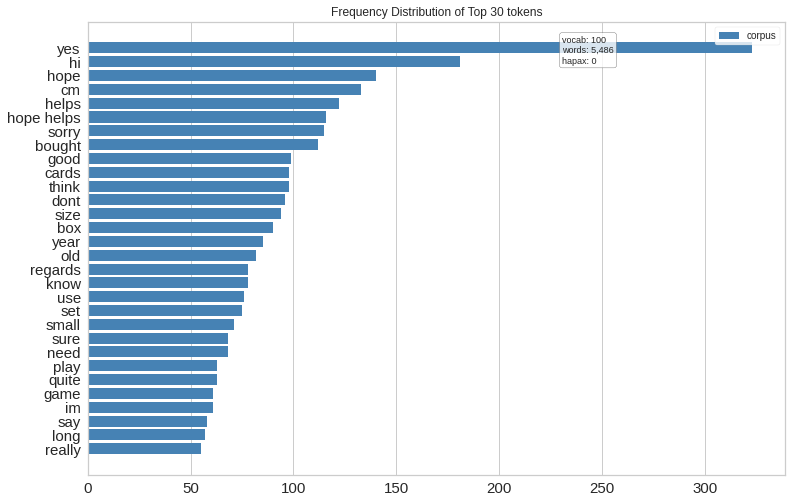

In [ ]:
## Generate a barplot of Answers 
most_common_words(df['answer_text_clean'])

# 5. Keyword Extraction

In [ ]:
# define a function that creates a new column that shows the keywords of text
# Also, create a barplot of most common 30 keyword
def key_words(text, col_name1, col_name2):
  # initiate the model
  kw_model = KeyBERT()
  # A new column for keywords and their importances
  df[col_name1] = text.apply(lambda x: kw_model.extract_keywords(x)) # get keywords and their weights
  df[col_name2] = df[col_name1].apply(lambda x: [i[0] for i in x]) # get just keywords
  # Use most_common_words() function to generate a bar plot
  most_common_words(df[col_name2]
                    .apply(lambda x: ' '.join(x))) # concat keywords

## *Product Information*

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

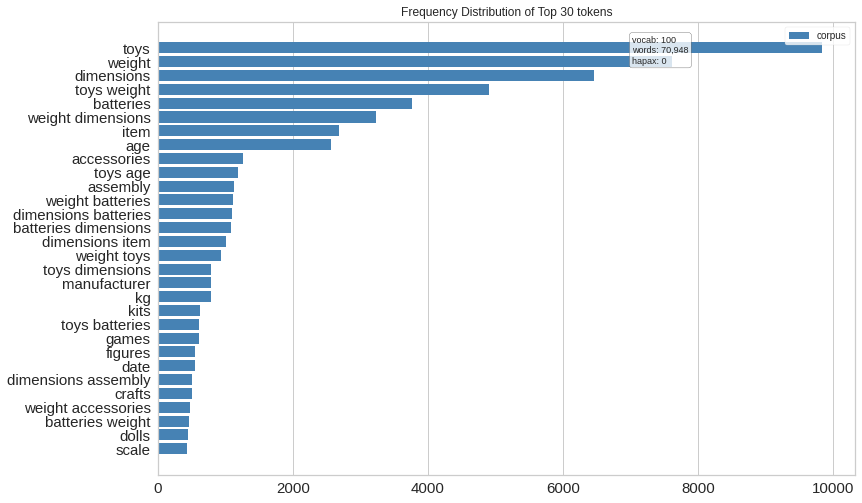

In [ ]:
# Utilize key_words() function for product information 
key_words(df['product_information_clean'], 'info_key_weight', 'info_key')

## *Description*

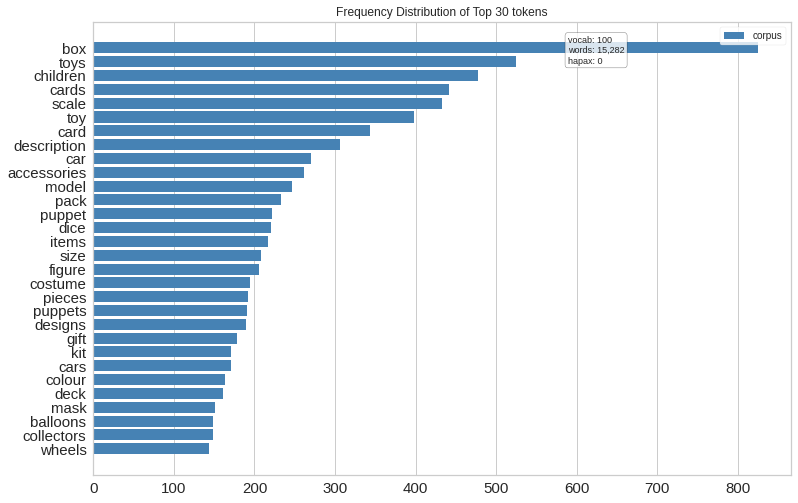

In [ ]:
# Utilize key_words function for product information 
key_words(df['description_clean'], 'desc_key_weight', 'desc_key')

## *Questions*

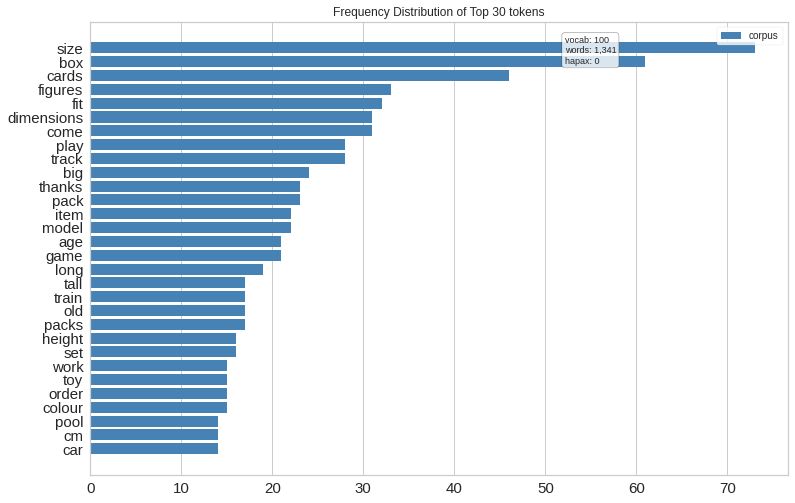

In [ ]:
# Utilize key_words function for questions -- WAY 1 --
# NOTE: Each questions for a product are accepted as a whole. 
# For instance, a product has 10 questions. All questions are accepted as a document.
key_words(df['question_text_clean'], 'ques_key_weight','ques_key_914')

In [ ]:
## All customer questions for a products are elements in a list. -- WAY 2 --
## Find the topic of all questions seperately
questions = list(flatten_everything(df['question_list']))
questions = [x for x in questions if x is not np.nan]
len(questions)

1679

In [ ]:
# Create a new dataframe for 1679 questions
df_keyword_q = pd.DataFrame()
# First column is list of questions
df_keyword_q['questions'] = questions
# Clean the question column
df_keyword_q['questions_clean'] = df_keyword_q['questions'].apply(lambda x : split_adjacent_words(x)).apply(lambda x : text_cleaning(x)).apply(lambda x : stopwords_shortwords(x))
# Initiate the model and extract keywords
kw_model = KeyBERT()
df_keyword_q['key_weight'] = kw_model.extract_keywords(df_keyword_q['questions_clean']) # get keywords and their weights
df_keyword_q['keys'] = df_keyword_q['key_weight'].apply(lambda x: [i[0] for i in x]) # get just keywords

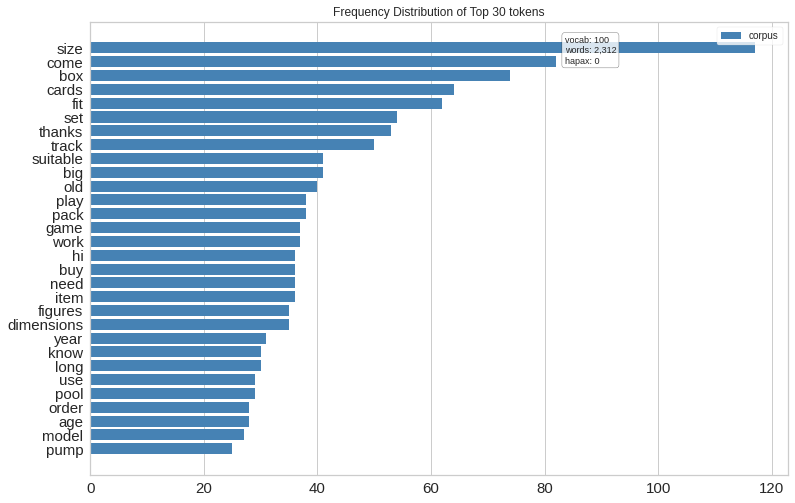

In [ ]:
# Use pre-defined most_common_words for plotting top 30 keywords
most_common_words(df_keyword_q['keys'].apply(lambda x: ' '.join(x))) # concat keywords

In [ ]:
df_keyword_q.head(10)

,questions,questions_clean,key_weight,keys
0,Does this catalogue detail all the previous Ho...,catalogue detail previous hornby products please,"[(catalogue, 0.643), (hornby, 0.5628), (produc...","[catalogue, hornby, products, previous]"
1,can you turn off sounds,turn sounds,"[(turn, 0.7215), (sounds, 0.4043)]","[turn, sounds]"
2,What is the gauge of the track,gauge track,"[(gauge, 0.7404), (track, 0.7085)]","[gauge, track]"
3,what is the layout of the tracks?,layout tracks,"[(tracks, 0.726), (layout, 0.5947)]","[tracks, layout]"
4,is it possible to replace thr grain of wheat l...,possible replace thr grain wheat lamps leds,"[(leds, 0.5047), (lamps, 0.4837), (wheat, 0.47...","[leds, lamps, wheat, grain, replace]"
5,Can this train go backwards as well as forward?,train go backwards well forward,"[(train, 0.6096), (backwards, 0.5957), (forwar...","[train, backwards, forward]"
6,Is this train set OO Gauge.,train set oo gauge,"[(gauge, 0.6255), (train, 0.4696), (set, 0.347...","[gauge, train, set, oo]"
7,can it sit directly on carpet or will i need ...,directly carpet need board put,"[(carpet, 0.6106), (board, 0.3492), (directly,...","[carpet, board, directly, need]"
8,Hi does this play Christmas sound effects thanks,hi play christmas sound effects thanks,"[(sound, 0.4354), (christmas, 0.4071), (effect...","[sound, christmas, effects, play, hi]"
9,is the carriages and engine hard plastic?,carriages engine hard plastic,"[(carriages, 0.5601), (plastic, 0.5025), (engi...","[carriages, plastic, engine, hard]"


In [ ]:
# Add 1679 product questions' keywords to main df

# Fill NaNs with ''
df['question_list'] = df['question_list'].fillna('')
# Generate a new column for list of topics
df['ques_key_1679'] = np.nan

# Find each questions keywords from df_keyword_q dataframe
for row in range(10000):                            # iterate through each raw of df
  keyword_list = []                                 # generate a blank list for topics
  for ques in df.loc[row, 'question_list']:         # iterate through each question 
    for line in range(len(df_keyword_q)):
      if df_keyword_q.loc[line, 'questions'] == ques:
        keyword_list.append(df_keyword_q.loc[line, 'keys'])
  df['ques_key_1679']=  df['ques_key_1679'].astype(object) # Change the type of column for insert the list of topics
  df.at[row, 'ques_key_1679'] = keyword_list

## *Answers*

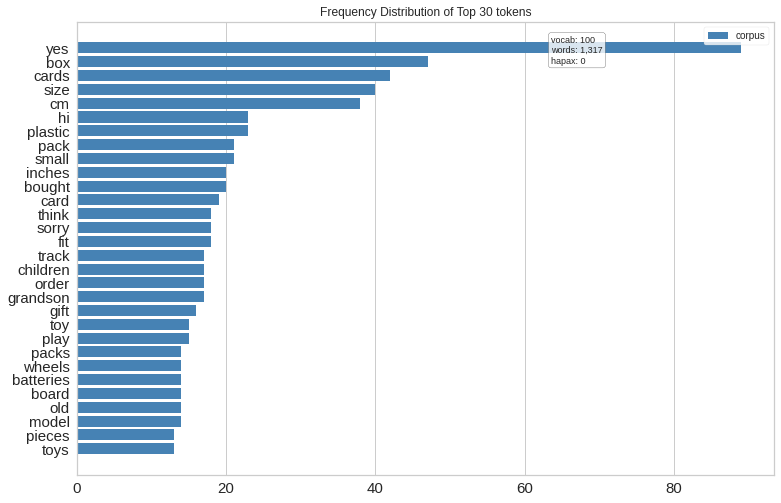

In [ ]:
# Utilize key_words function for answers -- WAY 1 --
# NOTE: Each answer for a product are accepted as a whole. 
# For instance, a product has 10 answers. All answers are accepted as a document.
key_words(df['answer_text_clean'], 'answer_key_weight', 'answer_key_914')

In [ ]:
## All customer answers for a products are elements in a list. -- WAY 2 --
## Find the topic of all answers seperately
answers = list(flatten_everything(df['answer_list']))
answers = [x for x in answers if x is not np.nan]
len(answers)

1679

In [ ]:
# Create a new dataframe for 1679 answers
df_keyword_a = pd.DataFrame()
# First column is list of answers
df_keyword_a['answers'] = answers
# Clean the question column
df_keyword_a['answers_clean'] = df_keyword_a['answers'].apply(lambda x : split_adjacent_words(x)).apply(lambda x : text_cleaning(x)).apply(lambda x : stopwords_shortwords(x))
# Initiate the model and extract keywords
kw_model = KeyBERT()
df_keyword_a['key_weight'] = kw_model.extract_keywords(df_keyword_a['answers_clean']) # get keywords and their weights
df_keyword_a['keys'] = df_keyword_a['key_weight'].apply(lambda x: [i[0] for i in x]) # get just keywords

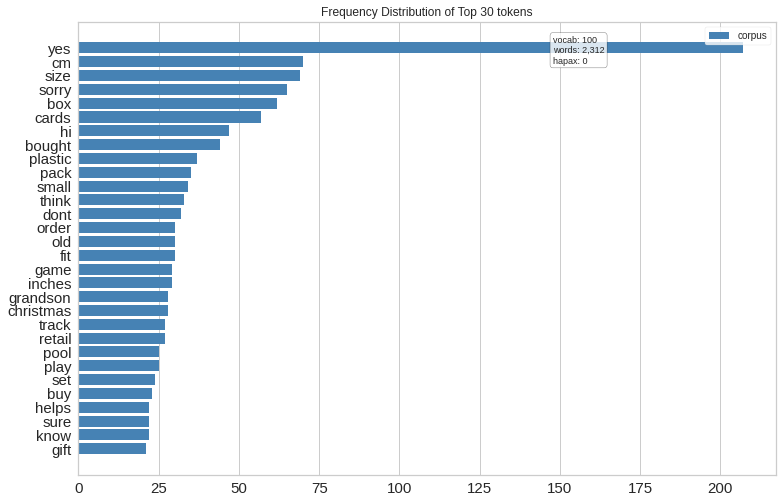

In [ ]:
# Use pre-defined most_common_words for plotting top 30 keywords
most_common_words(df_keyword_a['keys'].apply(lambda x: ' '.join(x))) # concat keywords

In [ ]:
# Add 1679 product questions' answers to main df

# Fill NaNs with ''
df['answer_list'] = df['answer_list'].fillna('')
# Generate a new column for list of topics
df['ans_key_1679'] = np.nan

# Find each answers' keys from df_keyword_a dataframe
for row in range(10000):                            # iterate through each raw of df
  answer_list = []                                 # generate a blank list for topics
  for ans in df.loc[row, 'answer_list']:         # iterate through each question 
    for line in range(len(df_keyword_a)):
      if df_keyword_a.loc[line, 'answers'] == ans:
        answer_list.append(df_keyword_a.loc[line, 'keys'])
  df['ans_key_1679']=  df['ans_key_1679'].astype(object) # Change the type of column for insert the list of topics
  df.at[row, 'ans_key_1679'] = answer_list

# 6. BERTopic

## *Questions*

There are 1679 customer questions for 914 products in total. Let's fit BERTopic model 1679 questions. Each question is accepted as a document.

**Note:** Due to the stochastic nature of UMAP, the results from BERTopic might differ even if you run the same code multiple times. Using custom embeddings allows you to try out BERTopic several times until you find the topics that suit you best. You only need to generate the embeddings themselves once and run BERTopic several times with different parameters. [Source](https://maartengr.github.io/BERTopic/faq.html). The model is saved as 'bertopic_model'.

In [ ]:
# we can use the CountVectorizer to preprocess our documents after having generated embeddings and clustered our documents.
vectorizer_model = CountVectorizer(stop_words="english")
# Initiate the model
model = BERTopic(language = "english", nr_topics='auto', vectorizer_model=vectorizer_model, calculate_probabilities=True) # define # of topics automatically.
topics, probs= model.fit_transform(questions)
# Most frequent topics
model.get_topic_info()

,Topic,Count,Name
0,-1,414,-1_does_size_tell_just
1,0,619,0_size_box_does_come
2,1,84,1_pump_pool_water_does
3,2,83,2_track_train_compatible_brio
4,3,64,3_plastic_metal_durable_paper
5,4,62,4_cards_25_pokemon_deck
6,5,46,5_old_year_suitable_ok
7,6,42,6_use_dry_stick_pens
8,7,41,7_colour_red_colours_blue
9,8,34,8_sounds_sound_does_music


**Note:** Let's use  the saved bertopic_model. Do not fit the model again. That creates new topics. For loading data, use BERTopic.load("my_model")

In [ ]:
# Generate a new datafram that shows the each questions topic and probability.
pred_topics = pd.DataFrame()
pred_topics["questions"] = questions
pred_topics["topic"] = topics

print(f"Shape: {pred_topics.shape}")

In [ ]:
# Add probabilities of topics to dataframe as new columns.
for i in range(0, 20):
  pred_topics[f'prob_{i}'] = np.nan

for row in range(len(pred_topics)):
  for i in range(0, 20):
    pred_topics.loc[row, f'prob_{i}'] = probs[row][i]

In [ ]:
# Fit clean product descriptions to bertopic_model
topics_desc, probs_desc= model.transform(df['description_clean'])

In [ ]:
# Append 1679 questions topics to main df

# Generate a new column for list of topics
df['ques_topic_list'] = np.nan

# Find each questions topics from pred_topics dataframe
for row in range(10000):                            # iterate through each raw of df
  topic_list = []                                   # generate a blank list for topics
  for ques in df.loc[row, 'question_list']:         # iterate through each question 
    for line in range(len(pred_topics)):
      if pred_topics.loc[line, 'questions'] == ques:
        topic_list.append(pred_topics.loc[line, 'topic'])
  df['ques_topic_list']=  df['ques_topic_list'].astype(object) # Change the type of column for insert the list of topics
  df.at[row, 'ques_topic_list'] = topic_list

In [ ]:
df_test = df[['description_clean', 'question_list', 'ques_topic_list']]
df_test.head()

,description_clean,question_list,ques_topic_list_2
0,product description hornby catalogue box conta...,[Does this catalogue detail all the previous H...,[0]
1,size name large funky buys large christmas hol...,[can you turn off sounds],[8]
2,big classic toy train set track carriage light...,"[What is the gauge of the track, what is the ...","[2, 2]"
3,hornby gauge br hawks worth rd class,,[]
4,product description hornby railroad gil den lo...,,[]


In [ ]:
# Add new descriptions topics to df_test
df_test['topic_0'] = topics_desc

# Append all probablities
for i in range(0, 20):
  df_test[f'prob_{i}'] = np.nan

for row in range(10000):
  for i in range(0, 20):
     df_test.loc[row, f'prob_{i}'] = round(probs_desc[row][i],5)

In [ ]:
# Threshold is 0.1
# If probability is more than 0.1, this topic belongs to description
for i in range(0, 20):
  df_test[f'prob_{i}'] = np.where(df_test[f'prob_{i}']> 0.1, 1, 0)

In [ ]:
# Create columns for question topics
for i in range(0,20):
    df_test[i] = 0

# Count the number of topic for each question
for row in range(10000):
  for k in range(20):
    for i in df_test.loc[row, 'ques_topic_list']:
      if i == k:
        df_test.loc[row, i] += 1

In [ ]:
df_test.head()

,description_clean,question_list,ques_topic_list_2,topic_0,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,...,10,11,12,13,14,15,16,17,18,19
0,product description hornby catalogue box conta...,[Does this catalogue detail all the previous H...,[0],0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,size name large funky buys large christmas hol...,[can you turn off sounds],[8],0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,big classic toy train set track carriage light...,"[What is the gauge of the track, what is the ...","[2, 2]",2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hornby gauge br hawks worth rd class,,[],2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,product description hornby railroad gil den lo...,,[],2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create new columns (coded_x). If customer ask question about a topic and this topic is not in description, let's code it as 1

for i in range(0, 20):
    df_test[f'coded_{i}'] = np.nan

for row in range(10000):
  for i in range(0, 20):
    if (df_test.loc[row, i] > 0) & (df_test.loc[row, f'prob_{i}'] ==0): ## if topic number is more than 0 and probability in description is 0
      df_test.loc[row, f'coded_{i}'] = 1
    else:
      df_test.loc[row, f'coded_{i}'] = 0

In [ ]:
# See the total number of rows coded as one
df_test.iloc[:, 44:].sum()

coded_0     79.0
coded_1     31.0
coded_2     19.0
coded_3     59.0
coded_4     34.0
coded_5     41.0
coded_6     15.0
coded_7     33.0
coded_8     28.0
coded_9     29.0
coded_10    17.0
coded_11     8.0
coded_12     3.0
coded_13    14.0
coded_14    15.0
coded_15    15.0
coded_16     1.0
coded_17    10.0
coded_18     8.0
coded_19     3.0
dtype: float64

In [ ]:
# save the dataframe
df_test.to_csv('df_test.csv')

In [ ]:
df_test.head()

,description_clean,question_list,ques_topic_list_2,topic_0,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,...,coded_10,coded_11,coded_12,coded_13,coded_14,coded_15,coded_16,coded_17,coded_18,coded_19
0,product description hornby catalogue box conta...,[Does this catalogue detail all the previous H...,[0],0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,size name large funky buys large christmas hol...,[can you turn off sounds],[8],0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,big classic toy train set track carriage light...,"[What is the gauge of the track, what is the ...","[2, 2]",2,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hornby gauge br hawks worth rd class,,[],2,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,product description hornby railroad gil den lo...,,[],2,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model.visualize_barchart(top_n_topics=20, n_words=8)

*Examine the question topics*

In [ ]:
pred_topics['topic_name'] = pred_topics['topic']
pred_topics['topic_name'] = pred_topics['topic_name'].replace({-1: 'Outliers',
                                                               0 : 'Size',
                                                               1 : 'Cards',
                                                               2 : 'Pool',
                                                               3 : 'Color',
                                                               4 : 'DIY',
                                                               5 : 'Material',
                                                               6 : 'Track-Train',
                                                               7 : 'Age',
                                                               8 : 'Sound',
                                                               9 : 'Delivery',
                                                               10: 'Kinetic-Sand',
                                                               11: 'Shipping',
                                                               12: 'Baloon',
                                                               13: 'Battery',
                                                               14: 'Kite',
                                                               15: 'Price',
                                                               16: 'Door',
                                                               17: 'Castle',
                                                               18: 'Players'})

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_heatmap()

In [ ]:
# Get the index of questions whose topic is '-1 & Outlier'
pred_topics[pred_topics['topic']==-1].index[300:]

Int64Index([1016, 1017, 1018, 1019, 1020, 1022, 1023, 1025, 1036, 1041,
            ...
            1646, 1655, 1656, 1657, 1661, 1666, 1668, 1673, 1674, 1675],
           dtype='int64', length=194)

In [ ]:
# What is the customer question?
pred_topics['questions'][1671]

'what size are the dominoes?'

In [ ]:
# Seach the topic of 'Outliers'
pred_topics['topic_name_imputed'] = pred_topics['topic_name']

size_list = [20, 51, 118, 134, 139, 142, 161, 174, 185, 208, 238, 240, 243, 251, 264, 334, 335,
             351, 447, 497, 619, 624, 645, 663, 679, 684, 687, 698, 708, 710, 720, 737, 747, 774, 
             775, 788, 791, 799, 802, 824, 834, 840, 879, 908, 913, 959, 990, 991, 994, 1004, 1005, 
             1013, 1014, 1053, 1086, 1091, 1111, 1123, 1147, 1197, 1199, 1206, 1225, 1257, 1264, 1277,
             1294, 1323, 1343, 1345, 1404, 1410, 1453, 1457, 1475, 1478, 1530, 1532,1560,1634, 1640, 
             1641, 1645, 1657, 1662, 1668, 1670, 1671]
shipping_list = [46, 212, 341, 1097]
age_list = [182, 421, 533, 544, 969, 1098, 1601]
track_train_list = [11, 17, 154, 768, 813] 
pred_topics.loc[size_list, 'topic_name_imputed'] = 'Size'
pred_topics.loc[shipping_list, 'topic_name_imputed'] = 'Shipping'
pred_topics.loc[age_list, 'topic_name_imputed'] = 'Age'
pred_topics.loc[track_train_list, 'topic_name_imputed'] = 'Track-Train'
pred_topics.loc[[177, 1157], 'topic_name_imputed'] = 'Color'
pred_topics.loc[[454, 1292, 1328, 1473], 'topic_name_imputed'] = 'Battery'

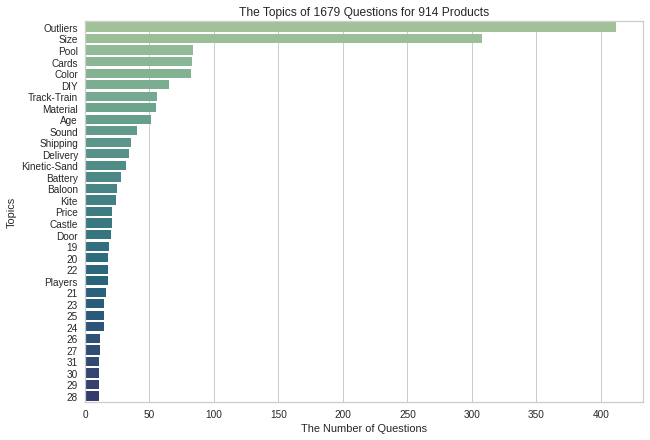

In [ ]:
# the number of customer questions accordng to categories
plt.figure(figsize=(10,7)) 
ax = sns.countplot(data = pred_topics, y='topic_name_imputed', order = pred_topics['topic_name_imputed'].value_counts().index, palette='crest')
ax.set_title('The Topics of 1679 Questions for 914 Products')
ax.set_xlabel("The Number of Questions")
ax.set_ylabel("Topics")
plt.show()

In [ ]:
# Download this dataframe. BERTopic doesn't generate same results. I will use this topics. 
pred_topics.to_csv('question_topics')

In [ ]:
pred_topics = pd.read_csv('question_topics.csv', index_col = 0)
pred_topics.head()

,questions,topic,prob,topic_name,topic_name_imputed
0,Does this catalogue detail all the previous Ho...,0,0.701502,Size,Size
1,can you turn off sounds,8,1.000000,Sound,Sound
2,What is the gauge of the track,0,1.000000,Size,Size
3,what is the layout of the tracks?,0,1.000000,Size,Size
4,is it possible to replace thr grain of wheat l...,-1,0.000000,Outliers,Outliers


In [ ]:
# Append 1679 questions topics to main df

# Fill NaNs with ''
df['question_list'] = df['question_list'].fillna('')
# Generate a new column for list of topics
df['ques_topic_list'] = np.nan

# Find each questions topics from pred_topics dataframe
for row in range(10000):                            # iterate through each raw of df
  topic_list = []                                   # generate a blank list for topics
  for ques in df.loc[row, 'question_list']:         # iterate through each question 
    for line in range(len(pred_topics)):
      if pred_topics.loc[line, 'questions'] == ques:
        topic_list.append(pred_topics.loc[line, 'topic_name_imputed'])
  df['ques_topic_list']=  df['ques_topic_list'].astype(object) # Change the type of column for insert the list of topics
  df.at[row, 'ques_topic_list'] = topic_list

## *Answers*

In [ ]:
# we can use the CountVectorizer to preprocess our documents after having generated embeddings and clustered our documents.
vectorizer_model = CountVectorizer(stop_words="english")
# Initiate the model
model_ans = BERTopic(language = "english", nr_topics='auto', vectorizer_model=vectorizer_model) # define # of topics automatically.
topics_2, probs_2 = model_ans.fit_transform(answers)
# Most frequent topics
model_ans.get_topic_info()

,Topic,Count,Name
0,-1,453,-1_yes_dont_size_hi
1,0,554,0_yes_sorry_bought_year
2,1,177,1_inches_cm_size_long
3,2,92,2_cards_deck_card_pack
4,3,73,3_red_blue_pink_order
5,4,67,4_pool_pump_air_water
6,5,46,5_track_train_range_wooden
7,6,41,6_dry_heat_wash_wipe
8,7,36,7_plastic_metal_hard_resin
9,8,27,8_25_24_bile_51


***Topic -1 is the largest and it refers to outliers that do not assign to any topics generated. In this case, we will ignore Topic -1.***

In [ ]:
# Generate a new datafram thta shows the each questions topic and probability...
answer_topics = pd.DataFrame()
answer_topics["answers"] = answers
answer_topics["topic"] = topics_2
answer_topics['prob'] = probs_2

answer_topics.head()

,answers,topic,prob
0,HiThe 2014 catalogue does indeed detail previ...,0,1.000000
1,hi no you cant turn sound off,0,0.786458
2,"Hi Paul.Truthfully, I'm not sure. But it's ve...",5,0.569752
3,Its an oval shape layout,-1,0.000000
4,Hi Pete. No it's not possible the main pole i...,-1,0.000000


In [ ]:
model_ans.visualize_barchart(top_n_topics=15, n_words=8)

In [ ]:
answer_topics['topic_name'] = answer_topics['topic']
answer_topics['topic_name'] = answer_topics['topic_name'].replace({-1: 'Outliers',
                                                               0 : 'Yes-Sorry',
                                                               1 : 'Size',
                                                               2 : 'Cards',
                                                               3 : 'Color',
                                                               4 : 'Pool',
                                                               5 : 'Track-Train',
                                                               6 : 'DIY',
                                                               7 : 'Material',
                                                               8 : 'Numbers',
                                                               9 : 'Cars',
                                                               10: 'Battery',
                                                               11: 'Kite',
                                                               12: 'Sadly',
                                                               13: 'Doll',
                                                               14: 'Kite',
                                                               15: 'Sound'})

In [ ]:
# Append 1679 answers topics to main df

# Generate a new column for list of topics
df['ans_topic_list'] = np.nan

# Find each questions topics from pred_topics dataframe
for row in range(10000):                            # iterate through each raw of df
  topic_list = []                                   # generate a blank list for topics
  for ans in df.loc[row, 'answer_list']:         # iterate through each question 
    for line in range(len(answer_topics)):
      if answer_topics.loc[line, 'answers'] == ans:
        topic_list.append(answer_topics.loc[line, 'topic_name'])
  df['ans_topic_list']=  df['ans_topic_list'].astype(object) # Change the type of column for insert the list of topics
  df.at[row, 'ans_topic_list'] = topic_list

In [ ]:
answer_topics.to_csv('answer_topics.csv')

# 7. Similarity Between Textual Data: Tf-IDf

In [ ]:
def identity_tokenizer(text):
    return text
    
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

## 7.1 *Calculating Description & Information Similarity*

In [ ]:
# Tokenize and stem the clean columns
# Generate two temporary columns
df['text1'] = df['description_clean'].apply(word_tokenize).apply(lambda x: stemming(x))
df['text2'] = df['product_information_clean'].apply(word_tokenize).apply(lambda x: stemming(x))

# Create a empty list for similarities
similarity_list = []

#Define TfIdfVectorizer
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)  

for r in range(len(df)): # Visit all rows
    try:
      # Df for each row's text and description
      df_similarity = pd.DataFrame([[df['text1'].loc[r]], # tokenized-Stemmed clean description
                                    [df['text2'].loc[r]]] # tokenized-Stemmed product description
                      , columns=['text'])
      # Transform two rows of column
      tdidf_vector = tfidf.fit_transform(df_similarity['text'])
      # calculate similarity
      similarities = cosine_similarity(tdidf_vector[0],tdidf_vector[1])
      # Add to the list
      similarity_list.append(similarities)
    except:
    # The cosine similarity is a number between 0 and 1
      similarity_list.append(0.001)

df['desc_info_sim'] = similarity_list
df['desc_info_sim'] = df['desc_info_sim'].apply(lambda x: str(x).replace('[', '').replace(']','')).astype(float)
df = df.drop(columns=['text1', 'text2']) # Drop temporary columns

**Note:** We have to check the similartiy metric of products whose "description" and "product_information" is NAN. If there is no text, similarity mteric is accepted as 0. 

In [ ]:
# Find the sum of similarity metrics for "description" and "product_information" is NAN
df[(df['description'].isna()) & (df['product_information'].isna())]['desc_info_sim'].sum()

0.002

In [ ]:
# Chech the similarity metric == 0.001
df[df['desc_info_sim']==0.001][['description', 'product_information','desc_info_sim']]

,description,product_information,desc_info_sim
1808,NaN,NaN,0.001
3258,NaN,NaN,0.001


In [ ]:
# replace 0.001 with zero because both of them is NAN
df['desc_info_sim'] = df['desc_info_sim'].replace(0.001, 0.000)

In [ ]:
# There are 9293 products. These product's similarity can be calculated.
df.loc[(df['description'].isna()==False) & (df['product_information'].isna()==False), :].shape

(9293, 102)

## 7.2 *Calculating Description & Question Similarity*

In [ ]:
# Tokenize and stem the clean columns
# Generate two temporary columns
df['text1'] = df['description_clean'].apply(word_tokenize).apply(lambda x: stemming(x))
df['text2'] = df['question_text_clean'].apply(word_tokenize).apply(lambda x: stemming(x))

# Create a empty list for similarities
similarity_list = []

#Define TfIdfVectorizer
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)  

for r in range(len(df)): # Visit all rows
    try:
      # Df for each row's text and description
      df_similarity = pd.DataFrame([[df['text1'].loc[r]],  # tokenized-Stemmed clean description
                                    [df['text2'].loc[r]]]  # tokenized-Stemmed questions
                      , columns=['text'])
      # Transform two rows of column
      tdidf_vector = tfidf.fit_transform(df_similarity['text'])
      # calculate similarity
      similarities = cosine_similarity(tdidf_vector[0],tdidf_vector[1])
      # Add to the list
      similarity_list.append(similarities)
    except:
    # The cosine similarity is a number between 0 and 1
      similarity_list.append(0.001)

df['desc_ques_sim'] = similarity_list
df['desc_ques_sim'] = df['desc_ques_sim'].apply(lambda x: str(x).replace('[', '').replace(']','')).astype(float)
df = df.drop(columns=['text1', 'text2'])

**Note:** We have to check the similarity metric of products whose "description" and "question" is NAN.

In [ ]:
# Find the # of products for "description" OR "customer_questions_and_answers" is NAN
df[ (df['description'].isna()) | (df['customer_questions_and_answers'].isna()) ][['description','desc_ques_sim']].shape[0]

9120

In [ ]:
# Replace the similarity metrics for "description" and "question" is 0.000
df.loc[(df['description'].isna()==True) | (df['question_text']==''), 'desc_ques_sim'] = 0.000

In [ ]:
# The total number of products whose similarity metric can be calculated
df.loc[(df['description'].isna()==False) # Description text shouldn't be missing
         & (df['question_text']!=''), 'desc_ques_sim'].shape # Question text shouldn't be ''

(880,)

In [ ]:
# There are 880 products. These product's similarity can be calculated.
df.loc[(df['description'].isna()==False) & (df['question_text']!=''), 'desc_ques_sim']

0       0.359090
1       0.088947
2       0.335190
5       0.026760
7       0.214161
          ...   
9948    0.127937
9949    0.081207
9964    0.000000
9972    0.116718
9976    0.000000
Name: desc_ques_sim, Length: 880, dtype: float64

## 7.3 Calculating Description & Answers Similarity

In [ ]:
# Tokenize and stem the clean columns
# Generate two temporary columns
df['text1'] = df['description_clean'].apply(word_tokenize).apply(lambda x: stemming(x))
df['text2'] = df['answer_text_clean'].apply(word_tokenize).apply(lambda x: stemming(x))

# Create a empty list for similarities
similarity_list = []

#Define TfIdfVectorizer
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)  

for r in range(len(df)): # Visit all rows
    try:
      # Df for each row's text and description
      df_similarity = pd.DataFrame([[df['text1'].loc[r]], # # tokenized-Stemmed clean description
                                    [df['text2'].loc[r]]] # tokenized-Stemmed clean answers
                      , columns=['text'])
      # Transform two rows of column
      tdidf_vector = tfidf.fit_transform(df_similarity['text'])
      # calculate similarity
      similarities = cosine_similarity(tdidf_vector[0],tdidf_vector[1])
      # Add to the list
      similarity_list.append(similarities)
    except:
    # The cosine similarity is a number between 0 and 1
      similarity_list.append(0.001)

df['desc_ans_sim'] = similarity_list
df['desc_ans_sim'] = df['desc_ans_sim'].apply(lambda x: str(x).replace('[', '').replace(']','')).astype(float)
df = df.drop(columns=['text1', 'text2'])

**Note:** We have to check the similarity metric of products whose "description" and "answer" is NAN.

In [ ]:
# Find the # of products for "description" OR "customer_questions_and_answers" is NAN
df[ (df['description'].isna()) | (df['customer_questions_and_answers'].isna()) ][['description','desc_ans_sim']].shape[0]

9120

In [ ]:
# Replace the similarity metrics for "description" and "answer" is 0.000
df.loc[(df['description'].isna()==True) | (df['answer_text']==''), 'desc_ans_sim'] = 0.000

In [ ]:
# The total number of products whose similarity metric can be calculated
df.loc[(df['description'].isna()==False) # Description text shouldn't be missing
         & (df['answer_text']!=''), 'desc_ans_sim'].shape # Answer text shouldn't be ''

(880,)

In [ ]:
# There are 880 products. These product's similarity can be calculated.
df.loc[(df['description'].isna()==False) & (df['answer_text']!=''), 'desc_ans_sim']

0       0.075338
1       0.058298
2       0.145970
5       0.114925
7       0.059160
          ...   
9948    0.063254
9949    0.060562
9964    0.000000
9972    0.067443
9976    0.000000
Name: desc_ans_sim, Length: 880, dtype: float64

## 7.4 *Calculating Information & Question Similarity*

In [ ]:
# Tokenize and stem the clean columns
df['text1'] = df['product_information_clean'].apply(word_tokenize).apply(lambda x: stemming(x))
df['text2'] = df['question_text_clean'].apply(word_tokenize).apply(lambda x: stemming(x))

# Create a empty list for similarities
similarity_list = []

#Define TfIdfVectorizer
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)  

for r in range(len(df)): # Visit all rows
    try:
      # Df for each row's text and description
      df_similarity = pd.DataFrame([[df['text1'].loc[r]], # tokenized-stemmed clean information
                                    [df['text2'].loc[r]]]  # tokenized-stemmed clean question
                      , columns=['text'])
      # Transform two rows of column
      tdidf_vector = tfidf.fit_transform(df_similarity['text'])
      # calculate similarity
      similarities = cosine_similarity(tdidf_vector[0],tdidf_vector[1])
      # Add to the list
      similarity_list.append(similarities)
    except:
    # The cosine similarity is a number between 0 and 1
      similarity_list.append(0.001)

df['info_ques_sim'] = similarity_list
df['info_ques_sim'] = df['info_ques_sim'].apply(lambda x: str(x).replace('[', '').replace(']','')).astype(float)
df = df.drop(columns=['text1', 'text2'])

**Note:** We have to check the similarity metric of products whose "product description" and "question" is NAN.

In [ ]:
# Find the # of products for "product information" OR "customer_questions_and_answers" is NAN
df[ (df['product_information'].isna()) | (df['customer_questions_and_answers'].isna()) ][['description','info_ques_sim']].shape[0]

9096

In [ ]:
# Replace the similarity metrics for "product information" and "customer_questions_and_answers" is 0.000
df.loc[(df['product_information'].isna()==True) | (df['question_text']==''), 'info_ques_sim'] = 0.000

In [ ]:
# The total number of products whose similarity metric can be calculated
df.loc[(df['product_information'].isna()==False) # Information text shouldn't be missing
         & (df['question_text']!=''), 'info_ques_sim'].shape # Question text shouldn't be ''

(904,)

In [ ]:
# There are 904 products. These product's similarity can be calculated.
df.loc[(df['product_information'].isna()==False) & (df['question_text']!=''), 'info_ques_sim']

0       0.055660
1       0.000000
2       0.000000
5       0.024905
7       0.078179
          ...   
9948    0.038548
9949    0.033613
9964    0.000000
9972    0.000000
9976    0.039505
Name: info_ques_sim, Length: 904, dtype: float64

## 7.5 *Calculating Information & Answers Similarity*

In [ ]:
# Tokenize and stem the clean columns
df['text1'] = df['product_information_clean'].apply(word_tokenize).apply(lambda x: stemming(x))
df['text2'] = df['answer_text_clean'].apply(word_tokenize).apply(lambda x: stemming(x))

# Create a empty list for similarities
similarity_list = []

#Define TfIdfVectorizer
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)  

for r in range(len(df)): # Visit all rows
    try:
      # Df for each row's text and description
      df_similarity = pd.DataFrame([[df['text1'].loc[r]], # tokenized clean description
                                    [df['text2'].loc[r]]]      # Tokenized clean Q1
                      , columns=['text'])
      # Transform two rows of column
      tdidf_vector = tfidf.fit_transform(df_similarity['text'])
      # calculate similarity
      similarities = cosine_similarity(tdidf_vector[0],tdidf_vector[1])
      # Add to the list
      similarity_list.append(similarities)
    except:
    # The cosine similarity is a number between 0 and 1
      similarity_list.append(0.001)

df['info_ans_sim'] = similarity_list
df['info_ans_sim'] = df['info_ans_sim'].apply(lambda x: str(x).replace('[', '').replace(']','')).astype(float)

df = df.drop(columns=['text1', 'text2'])

**Note:** We have to check the similarity metric of products whose "product description" and "answer" is NAN.

In [ ]:
# Find the # of products for "product information" OR "customer_questions_and_answers" is NAN
df[ (df['product_information'].isna()) | (df['customer_questions_and_answers'].isna()) ][['description','info_ans_sim']].shape[0]

9096

In [ ]:
# Replace the similarity metrics for "product information" and "customer_questions_and_answers" is 0.000
df.loc[(df['product_information'].isna()==True) | (df['answer_text']==''), 'info_ans_sim'] = 0.000

In [ ]:
# The total number of products whose similarity metric can be calculated
df.loc[(df['product_information'].isna()==False) # Information text shouldn't be missing
         & (df['answer_text']!=''), 'info_ans_sim'].shape # Question text shouldn't be ''

(904,)

In [ ]:
# There are 904 products. These product's similarity can be calculated.
df.loc[(df['product_information'].isna()==False) & (df['answer_text']!=''), 'info_ans_sim']

0       0.097571
1       0.000000
2       0.120069
5       0.029297
7       0.043879
          ...   
9948    0.092695
9949    0.000000
9964    0.000000
9972    0.039844
9976    0.031115
Name: info_ans_sim, Length: 904, dtype: float64

## 7.6 *Calculating Question & Answers Similarity*

In [ ]:
# Tokenize and stem the clean columns
df['text1'] = df['question_text_clean'].apply(word_tokenize).apply(lambda x: stemming(x))
df['text2'] = df['answer_text_clean'].apply(word_tokenize).apply(lambda x: stemming(x))

# Create a empty list for similarities
similarity_list = []

#Define TfIdfVectorizer
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)  

for r in range(len(df)): # Visit all rows
    try:
      # Df for each row's text and description
      df_similarity = pd.DataFrame([[df['text1'].loc[r]], # tokenized clean description
                                    [df['text2'].loc[r]]]      # Tokenized clean Q1
                      , columns=['text'])
      # Transform two rows of column
      tdidf_vector = tfidf.fit_transform(df_similarity['text'])
      # calculate similarity
      similarities = cosine_similarity(tdidf_vector[0],tdidf_vector[1])
      # Add to the list
      similarity_list.append(similarities)
    except:
    # The cosine similarity is a number between 0 and 1
      similarity_list.append(0.001)

df['ques_ans_sim'] = similarity_list
df['ques_ans_sim'] = df['ques_ans_sim'].apply(lambda x: str(x).replace('[', '').replace(']','')).astype(float)
df = df.drop(columns=['text1', 'text2'])

**Note:** We have to check the similarity metric of products whose "questions" and "answers" is NAN.

In [ ]:
# Find the # of products for "product information" OR "customer_questions_and_answers" is NAN
df[(df['customer_questions_and_answers'].isna()) ][['description','ques_ans_sim']].shape[0]

9086

In [ ]:
# Replace the similarity metrics for "question" and "answer" is 0.000
df.loc[(df['answer_text']=='') | (df['question_text']==''), 'ques_ans_sim'] = 0.000

In [ ]:
# The total number of products whose similarity metric can be calculated
df.loc[(df['answer_text']!='') # Information text shouldn't be missing
         & (df['question_text']!=''), 'ques_ans_sim'].shape # Question text shouldn't be ''

(914,)

In [ ]:
# There are 904 products. These product's similarity can be calculated.
df.loc[(df['question_text']!='') & (df['question_text']!=''), 'ques_ans_sim']

0       0.154016
1       0.579739
2       0.067406
5       0.095961
7       0.175662
          ...   
9948    0.121603
9949    0.000000
9964    0.203267
9972    0.482680
9976    0.000000
Name: ques_ans_sim, Length: 914, dtype: float64

In [ ]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'category_and_sub_category',
       'customers_who_bought_this_item_also_bought',
       ...
       'ques_key_1679', 'ans_key_1679', 'ques_topic_list', 'ans_topic_list',
       'desc_info_sim', 'desc_ques_sim', 'desc_ans_sim', 'info_ques_sim',
       'info_ans_sim', 'ques_ans_sim'],
      dtype='object', length=107)

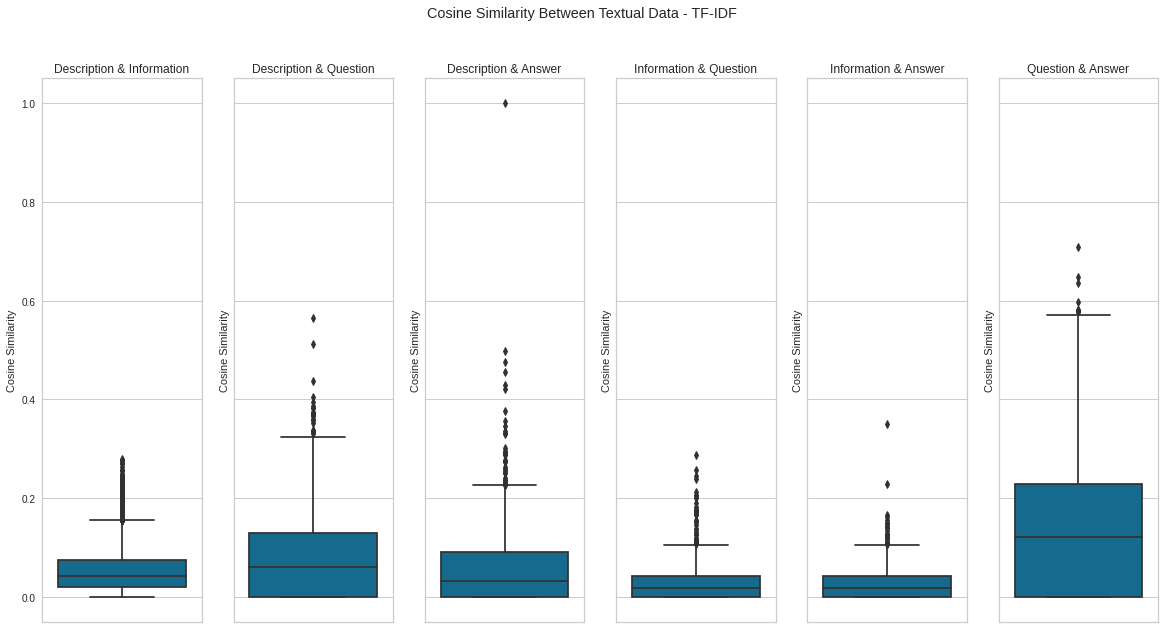

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10), sharey=True)

fig.suptitle('Cosine Similarity Between Textual Data - TF-IDF')

sns.boxplot(ax=axes[0], y=df[(df['description'].isna()==False) & (df['product_information'].isna()==False)]['desc_info_sim'])
sns.boxplot(ax=axes[1], y=df[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['desc_ques_sim'])
sns.boxplot(ax=axes[2], y=df[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['desc_ans_sim'])
sns.boxplot(ax=axes[3], y=df[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['info_ques_sim'])
sns.boxplot(ax=axes[4], y=df[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['info_ans_sim'])
sns.boxplot(ax=axes[5], y=df[(df['customer_questions_and_answers'].isna()==False)]['ques_ans_sim'])

axes[0].set_title('Description & Information')
axes[1].set_title('Description & Question')
axes[2].set_title('Description & Answer')
axes[3].set_title('Information & Question')
axes[4].set_title('Information & Answer')
axes[5].set_title('Question & Answer')

for i in range(0,6):
  axes[i].set_ylabel('Cosine Similarity')


plt.show()

# 8. Convert Sentence into VECTORS - BERT 

## 8.1 *Convert Product Descriptions*

In [ ]:
# Before transform the description remove punctuation except dot.
remove = string.punctuation
remove = remove.replace(".", "")
pattern = r"[{}]".format(re.escape(remove))

# define a function for removing punctuation
def remove_pu(x):
  x = re.sub(pattern, "", x)
  return x

clean = df['description'].fillna('').apply(lambda x : remove_pu(x))

# Define Transformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
# Get all descriptions in a list
text = clean[:].values
# Convert sentence to vectors
text_embeddings = model.encode(text)

# create a df for vectors 
df_desc_bert = pd.DataFrame(text_embeddings)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

## 8.2 *Convert Product Informations*

In [ ]:
# Before transform the description remove punctuation except dot.
remove = string.punctuation
remove = remove.replace(".", "")
pattern = r"[{}]".format(re.escape(remove))

# define a function for removing punctuation
def remove_pu(x):
  x = re.sub(pattern, "", x)
  return x

clean = df['product_information'].fillna('').apply(lambda x : remove_pu(x))

# Define Transformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
# Get all descriptions in a list
text = clean[:].values
# Convert sentence to vectors
text_embeddings = model.encode(text)

# create a df for vectors 
df_info_bert = pd.DataFrame(text_embeddings)

## 8.3 *Convert Customer Questions*

In [ ]:
# Before transform the description remove punctuation except dot.
remove = string.punctuation
remove = remove.replace(".", "")
pattern = r"[{}]".format(re.escape(remove))

# define a function for removing punctuation
def remove_pu(x):
  x = re.sub(pattern, "", x)
  return x

clean = df['question_text'].fillna('').apply(lambda x : remove_pu(x))

# Define Transformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
# Get all descriptions in a list
text = clean[:].values
# Convert sentence to vectors
text_embeddings = model.encode(text)

# create a df for vectors 
df_ques_bert = pd.DataFrame(text_embeddings)

## 8.4 *Convert Answers*

In [ ]:
# Before transform the description remove punctuation except dot.
remove = string.punctuation
remove = remove.replace(".", "")
pattern = r"[{}]".format(re.escape(remove))

# define a function for removing punctuation
def remove_pu(x):
  x = re.sub(pattern, "", x)
  return x

clean = df['answer_text'].fillna('').apply(lambda x : remove_pu(x))

# Define Transformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
# Get all descriptions in a list
text = clean[:].values
# Convert sentence to vectors
text_embeddings = model.encode(text)

# create a df for vectors 
df_ans_bert = pd.DataFrame(text_embeddings)

In [ ]:
df_bert_list = [df_desc_bert, df_info_bert, df_ques_bert, df_ans_bert]

for i in df_bert_list:
  print(i.shape)

(10000, 768)
(10000, 768)
(10000, 768)
(10000, 768)


# 9. Similarity with BERT

In [ ]:
df_similarity = df[['description', 'product_information', 'customer_questions_and_answers']]
df_similarity.isna().sum()

description                        651
product_information                 58
customer_questions_and_answers    9086
dtype: int64

In [ ]:
## DESCRIPTIONS and INFORMATION
similarity_list = []
for r in range(len(df)):
  sim = cosine_similarity([df_desc_bert.loc[r, :]], [df_info_bert.loc[r, :]])[0][0]
  similarity_list.append(sim)

# Append as new columns
df_similarity = df_similarity.assign(desc_info = similarity_list)

# replace the cosine similarity with 0 when text are missing.
df_similarity.loc[(df['description'].isna()==True) | (df['product_information'].isna()==True), 'desc_info'] = 0.000

In [ ]:
## DESCRIPTION and QUESTIONS

similarity_list = []
for r in range(len(df)):
  sim = cosine_similarity([df_desc_bert.loc[r, :]], [df_ques_bert.loc[r, :]])[0][0]
  similarity_list.append(sim)

# Append as new column
df_similarity = df_similarity.assign(desc_ques = similarity_list)

# replace the cosine similarity with 0 when text are missing.
df_similarity.loc[(df['description'].isna()==True) | (df['customer_questions_and_answers'].isna()==True), 'desc_ques'] = 0.000

In [ ]:
## DESCRIPTION and ANSWERS

similarity_list = []
for r in range(len(df)):
  sim = cosine_similarity([df_desc_bert.loc[r, :]], [df_ans_bert.loc[r, :]])[0][0]
  similarity_list.append(sim)

# Append as new column
df_similarity = df_similarity.assign(desc_ans = similarity_list)

# replace the cosine similarity with 0 when text are missing.
df_similarity.loc[(df['description'].isna()==True) | (df['customer_questions_and_answers'].isna()==True), 'desc_ans'] = 0.000

In [ ]:
# INFORMATION AND QUESTIONS
similarity_list = []
for r in range(len(df)):
  sim = cosine_similarity([df_info_bert.loc[r, :]], [df_ques_bert.loc[r, :]])[0][0]
  similarity_list.append(sim)

# Append as new column
df_similarity = df_similarity.assign(info_ques = similarity_list)

# replace the cosine similarity with 0 when text are missing.
df_similarity.loc[(df['product_information'].isna()==True) | (df['customer_questions_and_answers'].isna()==True), 'info_ques'] = 0.000

In [ ]:
# INFORMATION AND ANSWERS
similarity_list = []
for r in range(len(df)):
  sim = cosine_similarity([df_info_bert.loc[r, :]], [df_ans_bert.loc[r, :]])[0][0]
  similarity_list.append(sim)

# Append as new column
df_similarity = df_similarity.assign(info_ans = similarity_list)

# replace the cosine similarity with 0 when text are missing.
df_similarity.loc[(df['product_information'].isna()==True) | (df['customer_questions_and_answers'].isna()==True), 'info_ans'] = 0.000

In [ ]:
# QUESTIONS AND ANSWERS
similarity_list = []
for r in range(len(df)):
  sim = cosine_similarity([df_ques_bert.loc[r, :]], [df_ans_bert.loc[r, :]])[0][0]
  similarity_list.append(sim.astype(float))

# Append as new column
df_similarity = df_similarity.assign(ques_ans = similarity_list)

# replace the cosine similarity with 0 when text are missing.
df_similarity.loc[(df['customer_questions_and_answers'].isna()==True), 'ques_ans'] = 0.000

In [ ]:
df_similarity.head()
## BERT created same vector for '' blank text. Do not forget to replace them with 0.

,description,product_information,customer_questions_and_answers,desc_info,desc_ques,desc_ans,info_ques,info_ans,ques_ans
0,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight 640 g Product Di...,Does this catalogue detail all the previous Ho...,0.425010,0.657854,0.431746,0.307184,0.366006,0.516348
1,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,can you turn off sounds // hi no you cant turn...,0.707810,0.048274,0.087075,-0.046017,-0.071172,0.650230
2,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,What is the gauge of the track // Hi Paul.Trut...,0.711641,0.258379,0.710580,0.219794,0.667796,0.123593
3,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight 259 g Product Di...,NaN,0.461944,0.000000,0.000000,0.000000,0.000000,0.000000
4,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight 159 g Product Di...,NaN,0.769182,0.000000,0.000000,0.000000,0.000000,0.000000


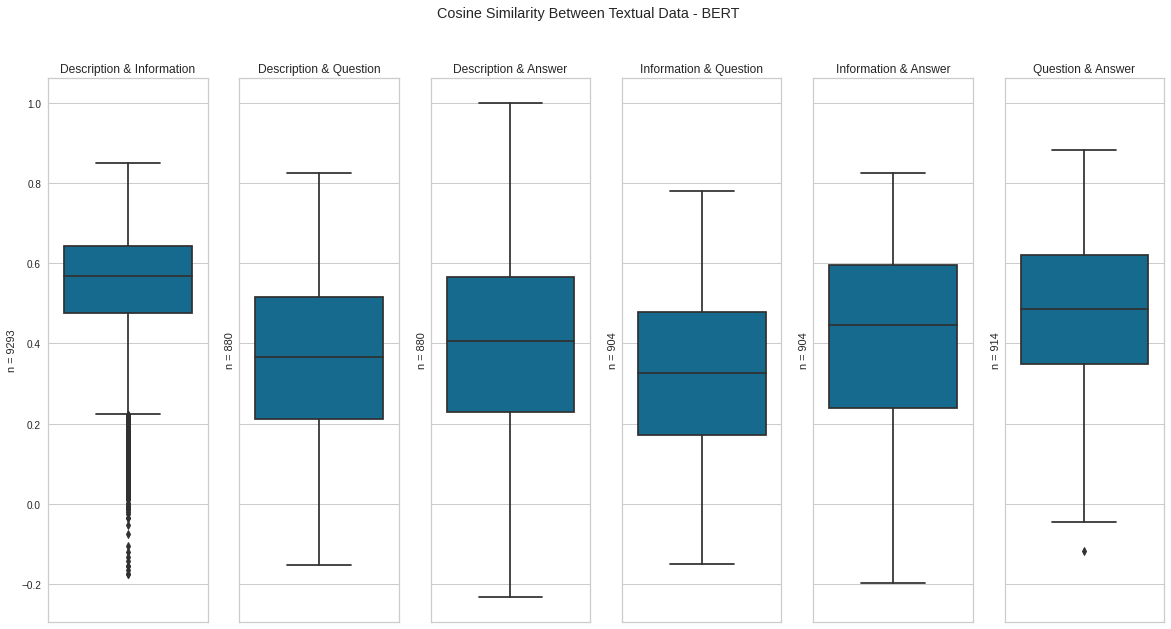

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10), sharey=True)

fig.suptitle('Cosine Similarity Between Textual Data - BERT')

sns.boxplot(ax=axes[0], y=df_similarity[(df['description'].isna()==False) & (df['product_information'].isna()==False)]['desc_info'], color = '')
sns.boxplot(ax=axes[1], y=df_similarity[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['desc_ques'])
sns.boxplot(ax=axes[2], y=df_similarity[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['desc_ans'])
sns.boxplot(ax=axes[3], y=df_similarity[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['info_ques'])
sns.boxplot(ax=axes[4], y=df_similarity[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)]['info_ans'])
sns.boxplot(ax=axes[5], y=df_similarity[(df['customer_questions_and_answers'].isna()==False)]['ques_ans'])

axes[0].set_title('Description & Information')
axes[1].set_title('Description & Question')
axes[2].set_title('Description & Answer')
axes[3].set_title('Information & Question')
axes[4].set_title('Information & Answer')
axes[5].set_title('Question & Answer')

axes[0].set_ylabel(f"n = {df_similarity[(df['description'].isna()==False) & (df['product_information'].isna()==False)].shape[0]}")
axes[1].set_ylabel(f"n = {df_similarity[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)].shape[0]}")
axes[2].set_ylabel(f"n = {df_similarity[(df['description'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)].shape[0]}")
axes[3].set_ylabel(f"n = {df_similarity[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)].shape[0]}")
axes[4].set_ylabel(f"n = {df_similarity[(df['product_information'].isna()==False) & (df['customer_questions_and_answers'].isna()==False)].shape[0]}")
axes[5].set_ylabel(f"n = {df_similarity[(df['customer_questions_and_answers'].isna()==False)].shape[0]}")

plt.show()

# 10. Download Dataframe

In [ ]:
df.shape


(10000, 96)

In [ ]:
# Concanate two dfs
# Get last 6 columns of df_similarity
df = pd.concat([df, df_similarity.iloc[:, 3:]], axis=1)

In [ ]:
# Download dataframes
path = '/content/drive/MyDrive/walmart c1 bootcamp/'

df.to_csv(path + 'df_after_textual.csv')

df_desc_bert.to_csv(path + 'description_bert_vector.csv')
df_info_bert.to_csv(path + 'information_bert_vector.csv')
df_ques_bert.to_csv(path + 'question_bert_vector.csv')
df_ans_bert.to_csv(path + 'answer_bert_vector.csv')

In [ ]:
session_info.show()